## Background and Context

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

## Objective

- To predict whether a liability customer will buy a personal loan or not.
- Which variables are most significant.
- Which segment of customers should be targeted more.

## Data Dictionary
* ID: Customer ID
* Age: Customer’s age in completed years
* Experience: #years of professional experience
* Income: Annual income of the customer (in thousand dollars)
* ZIP Code: Home Address ZIP code.
* Family: the Family size of the customer
* CCAvg: Average spending on credit cards per month (in thousand dollars)
* Education: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* Mortgage: Value of house mortgage if any. (in thousand dollars)
* Personal_Loan: Did this customer accept the personal loan offered in the last campaign?
* Securities_Account: Does the customer have securities account with the bank?
* CD_Account: Does the customer have a certificate of deposit (CD) account with the bank?
* Online: Do customers use internet banking facilities?
* CreditCard: Does the customer use a credit card issued by any other Bank (excluding All life Bank)?

## Data Structure and Summary

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, roc_auc_score, roc_curve, precision_recall_curve
from sklearn.model_selection import train_test_split
sns.set()
%matplotlib inline

In [2]:
data = pd.read_csv('Loan_Modelling.csv')   # original data

In [3]:
df = data.copy()  # make a copy of the original data

In [4]:
df.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [5]:
df.tail()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


In [6]:
df.shape

(5000, 14)

**Observation:** The data set consists of 5000 rows and 14 columns.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


**Observation:** All the columns are numerical variables. Personal_Loan is the depedent variable.

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIPCode,5000.0,93169.257000,1759.455086,90005.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal_Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


**Observation:**
- No missing values.
- ID seems to be merely a sequential ID for customers.
- Age ranges from 23 to 67, with equal mean and median.
- Experience has the minimum of -3, which doesn't make sense. It should be a non negative number since it represents the number of years of professional experience. Guess there's input error here and these records should be dropped. The mean and median are equal.
- Income has a wide range from \\$ 8k to \\$ 224k. Mean is larger than median, indicating possible outliers on the upper end.
- Family size ranges from 1 to 4. Median is 2.
- 75% customers pay \\$ 2.5k per month on credit card on average, though some could pay as high as \\$ 10k.
- Home mortgage ranges from 0 to \\$ 635 k. At least 50% of customers have zero balance.
- At least 75% of customers didn't accept the personal loan offered in the last campaign.
- At least 75% of customers don't have security account or CD account with AllLife Bank.
- More than 50% of customers use online banking.
- At least 50% of customers don't use a credit card issued by any other banks.

In [9]:
# check the unique values in each column
for col in df.columns:
    print("the number of unique values in " + col + " :" + str(df[col].nunique()) )
    print(df[col].unique())
    print("")

the number of unique values in ID :5000
[   1    2    3 ... 4998 4999 5000]

the number of unique values in Age :45
[25 45 39 35 37 53 50 34 65 29 48 59 67 60 38 42 46 55 56 57 44 36 43 40
 30 31 51 32 61 41 28 49 47 62 58 54 33 27 66 24 52 26 64 63 23]

the number of unique values in Experience :47
[ 1 19 15  9  8 13 27 24 10 39  5 23 32 41 30 14 18 21 28 31 11 16 20 35
  6 25  7 12 26 37 17  2 36 29  3 22 -1 34  0 38 40 33  4 -2 42 -3 43]

the number of unique values in Income :162
[ 49  34  11 100  45  29  72  22  81 180 105 114  40 112 130 193  21  25
  63  62  43 152  83 158  48 119  35  41  18  50 121  71 141  80  84  60
 132 104  52 194   8 131 190  44 139  93 188  39 125  32  20 115  69  85
 135  12 133  19  82 109  42  78  51 113 118  64 161  94  15  74  30  38
   9  92  61  73  70 149  98 128  31  58  54 124 163  24  79 134  23  13
 138 171 168  65  10 148 159 169 144 165  59  68  91 172  55 155  53  89
  28  75 170 120  99 111  33 129 122 150 195 110 101 191 140 153 173 174


**Observation:**
- Experience has negative values -1, -2 and -3, totally 52 observations.
- Other columns seem to be normal.

In [10]:
df = df[df.Experience >= 0]    # drop df.Experience < 0 rows
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,4948.0,2501.268795,1443.277676,1.0,1254.75,2497.5,3750.25,5000.0
Age,4948.0,45.557195,11.320735,24.0,36.00,46.0,55.00,67.0
Experience,4948.0,20.331043,11.311973,0.0,10.75,20.0,30.00,43.0
Income,4948.0,73.814470,46.112596,8.0,39.00,64.0,98.00,224.0
ZIPCode,4948.0,93168.503436,1761.076366,90005.0,91911.00,93437.0,94608.00,96651.0
Family,4948.0,2.391471,1.148444,1.0,1.00,2.0,3.00,4.0
CCAvg,4948.0,1.935926,1.747694,0.0,0.70,1.5,2.60,10.0
Education,4948.0,1.878941,0.839745,1.0,1.00,2.0,3.00,3.0
Mortgage,4948.0,56.634398,101.828885,0.0,0.00,0.0,101.00,635.0
Personal_Loan,4948.0,0.097009,0.296000,0.0,0.00,0.0,0.00,1.0


## Univariate Analysis

### The distribution of continuous variables

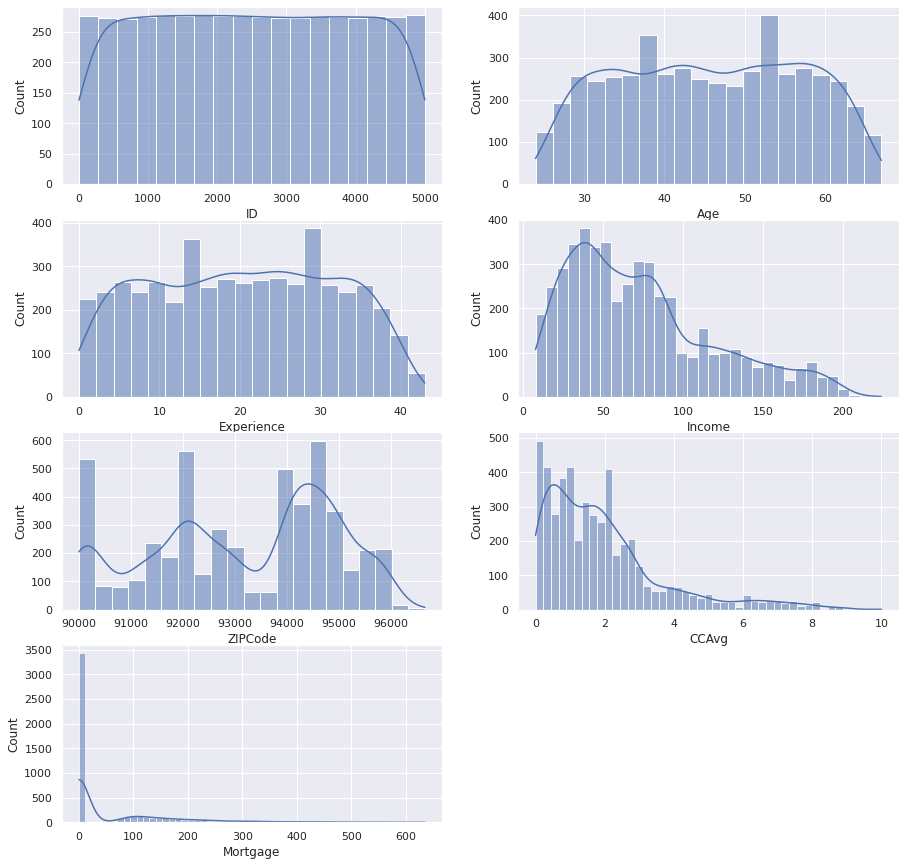

In [11]:
continuous_cols = ['ID', 'Age', 'Experience', 'Income', 'ZIPCode', 'CCAvg', 'Mortgage']   # continuous columns

plt.figure(figsize = (15,15))
for i, col in enumerate(continuous_cols):
    plt.subplot(4,2, i + 1)
    sns.histplot(df[col], kde = True);     # histogram

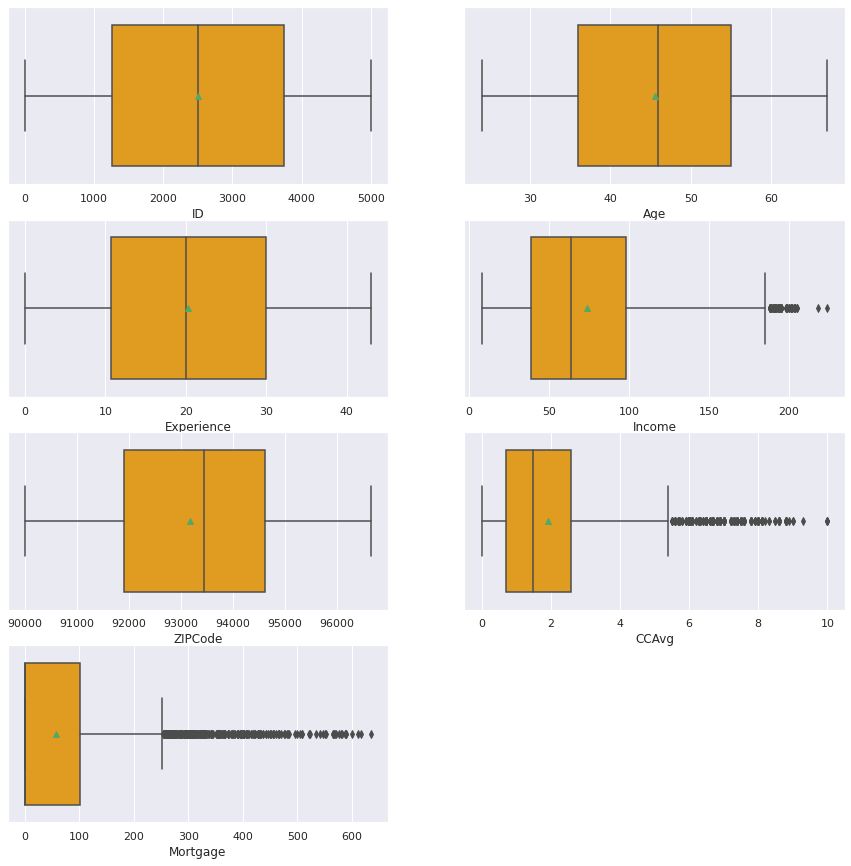

In [12]:
plt.figure(figsize = (15,15))
for i, col in enumerate(continuous_cols):
    plt.subplot(4,2, i + 1)
    sns.boxplot(x = col, data = df, color = 'orange', showmeans = True);   # box plot

**Observation:**
- ID, Age and Experience are not skewed and have no outliers.
- Income, CCAvg and Mortgage are right skewed, with lots of outliers on the right end.
- ZIPCode is left skewed and has no outliers.

### The distribution of categorical variables

In [13]:
category_cols = list(set(df.columns) - set(continuous_cols))  # category columns
category_cols

['CD_Account',
 'Education',
 'Securities_Account',
 'Personal_Loan',
 'Online',
 'Family',
 'CreditCard']

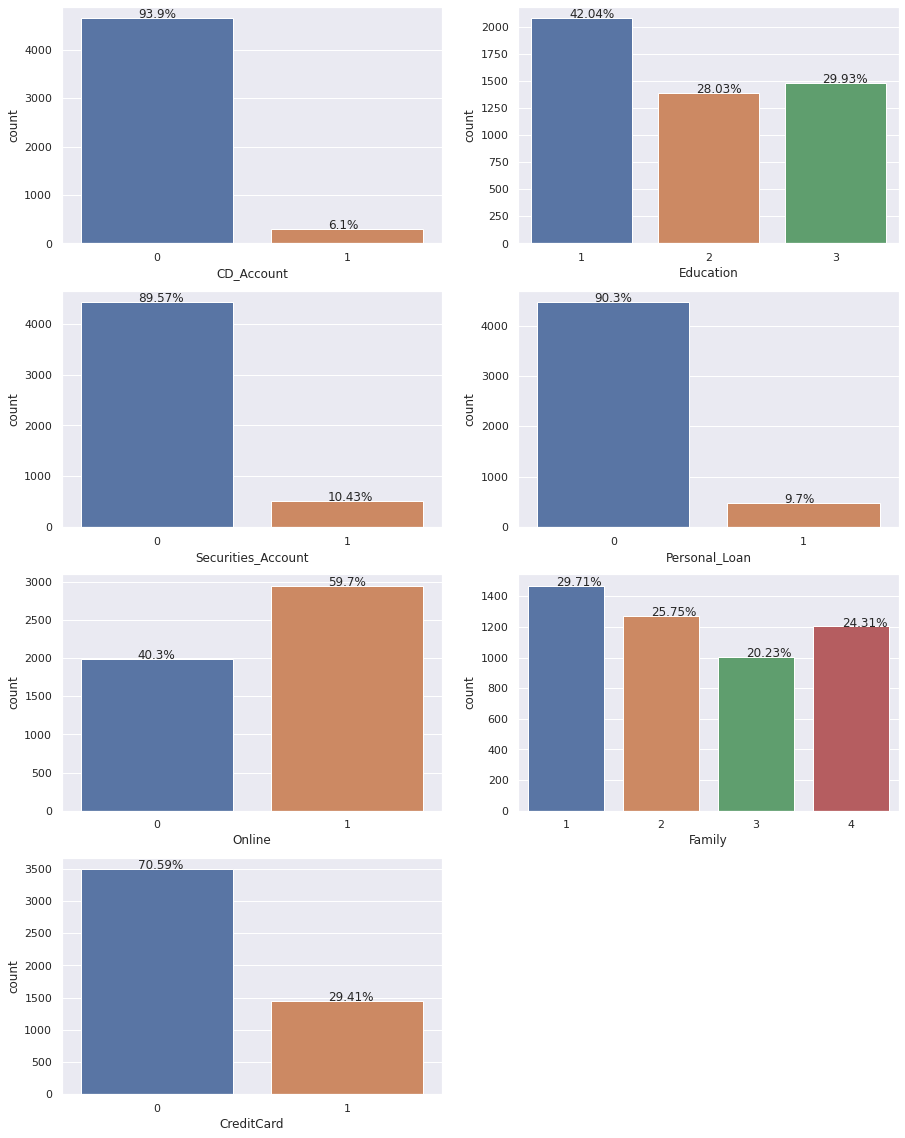

In [14]:
plt.figure(figsize = (15,20))

for i, col in enumerate(category_cols):
    plt.subplot(4,2, i + 1)
    ax = sns.countplot(data = df, x = col);     # cout plot
    total = df.shape[0]
    for p in ax.patches:
        percent = p.get_height() / total * 100
        x = p.get_x() + p.get_width() / 2 - 0.1
        y = p.get_y() + p.get_height() + 0.1
        ax.annotate(str(round(percent, 2)) + '%', (x, y), fontsize = 12)

**Observation:**
- 30% of customers are single, followed by family size of 2 and 4.
- Only 9.7% of customers took the personal loan in the last campagin, which matches the result of the campaign last year for liability customers with a conversion rate of over 9% success. The dataset is very imbalanced.
- 60% of customers used internet banking facility.
- Although majority customers are depositors, only a few have certificate of deposit account and securities account. Maybe they just go with saving account and checking account.
- About 30% of customers have a credit card issued by any other banks.
- 42% of customers are undergraduate. The numbers of professional and graduate are quite alike.

## Bivariate Analysis

### Heatmap and pairplot

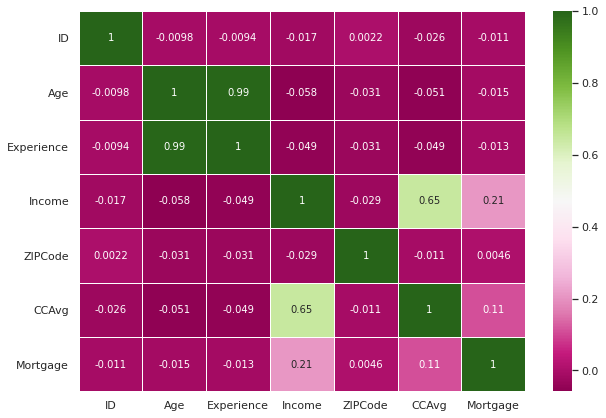

In [15]:
plt.figure(figsize = (10,7))
sns.heatmap(data = df[continuous_cols].corr(), annot = True, cmap = 'PiYG', linewidths = 0.5);    # heat map

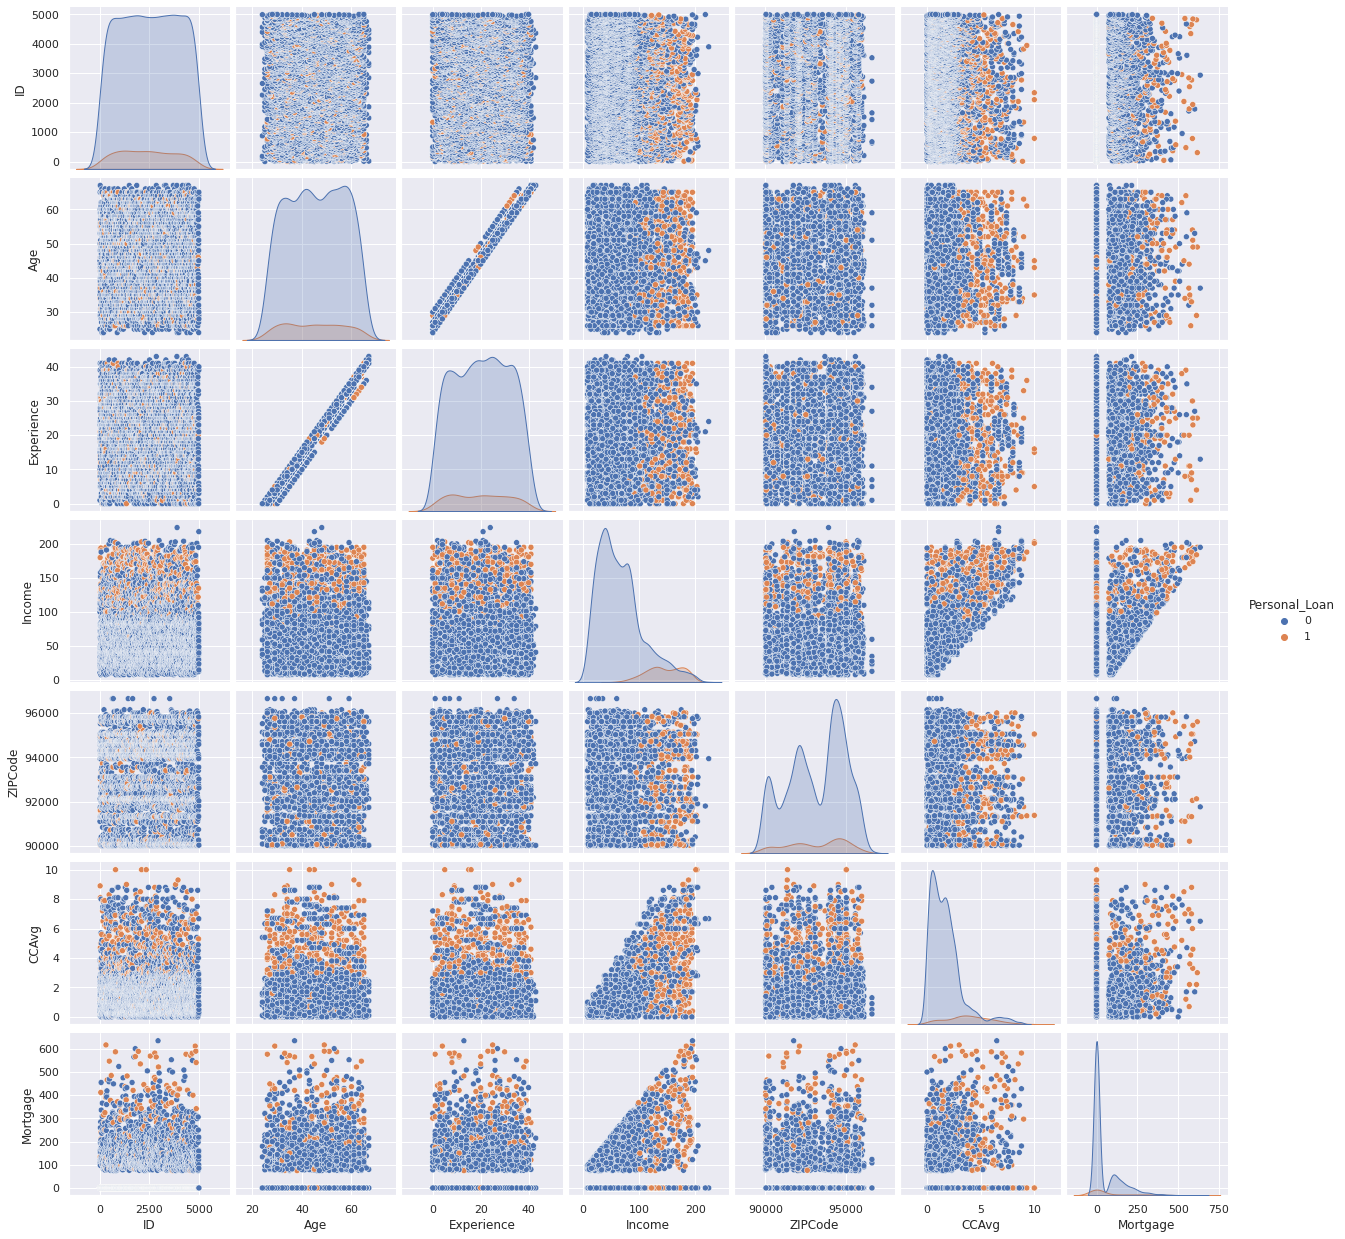

In [16]:
sns.pairplot(df, vars = continuous_cols, hue = 'Personal_Loan');  # pair plot

**Observation:**
- Experience and Age have high positive correlation. 
- CCAvg and Income have medium positive correlation.
- For customers with mortgage, income and mortgage are positively correlated.
- ID has no serious correlation with any other columns. It's really just a sequential index. We should drop it before the model building.

### Age vs Personal_Loan

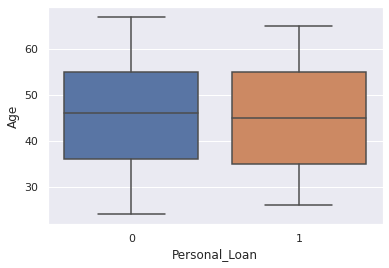

In [17]:
sns.boxplot(x = 'Personal_Loan', y = 'Age', data = df);

**Observation:** Age seems to make little difference in the acceptance of personal loan.

### Experience vs Personal_Loan

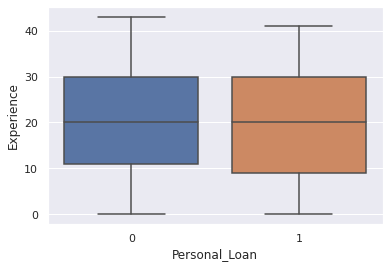

In [18]:
sns.boxplot(x = 'Personal_Loan', y = 'Experience', data = df);

**Observation:** Experience seems to make little difference in the acceptance of personal loan.

### Income vs Personal_Loan

In [19]:
df.groupby(['Personal_Loan'])['Income'].describe()

,count,mean,std,min,25%,50%,75%,max
Personal_Loan,,,,,,,,
0,4468.0,66.194270,40.610054,8.0,35.0,59.0,84.0,224.0
1,480.0,144.745833,31.584429,60.0,122.0,142.5,172.0,203.0


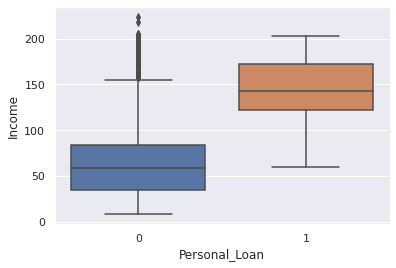

In [20]:
sns.boxplot(x = 'Personal_Loan', y = 'Income', data = df);

**Observation:** People accepting the loan have higher income. The group rejecting the loan has some outliers on the upper end.

### CCAvg vs Personal_Loan

In [21]:
df.groupby(['Personal_Loan'])['CCAvg'].describe()

,count,mean,std,min,25%,50%,75%,max
Personal_Loan,,,,,,,,
0,4468.0,1.724349,1.565008,0.0,0.6,1.4,2.3000,8.8
1,480.0,3.905354,2.097681,0.0,2.6,3.8,5.3475,10.0


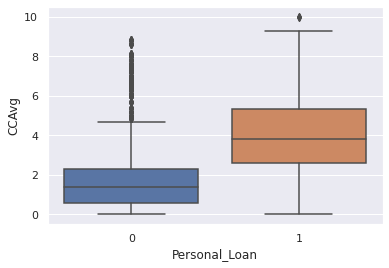

In [22]:
sns.boxplot(x = 'Personal_Loan', y = 'CCAvg', data = df);

**Observation:** Customers accepting the loan spend more on credit cards per month. Both groups have outliers on the upper end.

### Mortgage vs Personal_Loan

In [23]:
df["Mortgage_Paidoff"] = (df.Mortgage == 0)   # add a column Mortgage_paidoff to df
pd.crosstab(index = df['Mortgage_Paidoff'], columns = df['Personal_Loan']).sort_values(by = 1, ascending = False)

Personal_Loan,0,1
Mortgage_Paidoff,,
True,3110,312
False,1358,168


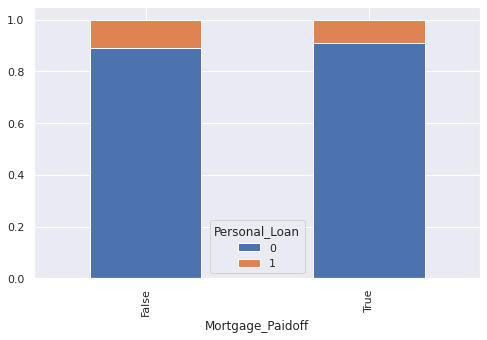

In [24]:
pd.crosstab(index = df['Mortgage_Paidoff'], columns = df['Personal_Loan'], normalize = 'index').plot(kind = 'bar', stacked = True, figsize = (8,5));

**Observation:** The conversion rate between mortgage paid off group and non-paid off group are similar.

In [25]:
df[df.Mortgage > 0].groupby(['Personal_Loan'])['Mortgage'].describe()    # only records with mortgage balance > 0

,count,mean,std,min,25%,50%,75%,max
Personal_Loan,,,,,,,,
0,1358.0,170.707658,87.201074,75.0,106.0,146.0,211.00,635.0
1,168.0,288.130952,141.145466,75.0,174.0,282.0,373.25,617.0


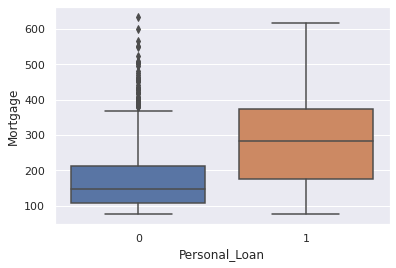

In [26]:
sns.boxplot(x = 'Personal_Loan', y = 'Mortgage', data = df[df.Mortgage > 0]);

**Observation:** For customers with mortgage, those with higher balance are more likely to accept the loan.

### Family vs Personal_Loan

In [27]:
pd.crosstab(index = df['Family'], columns = df['Personal_Loan']).sort_values(by = 1, ascending = False)

Personal_Loan,0,1
Family,,
4,1069,134
3,868,133
1,1363,107
2,1168,106


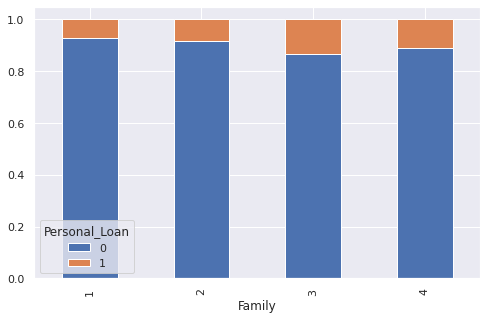

In [28]:
pd.crosstab(index = df['Family'], columns = df['Personal_Loan'], normalize = 'index').plot(kind = 'bar', stacked = True, figsize = (8,5));

**Observation:** Customers of family size of 3 or 4 are more likely to accept the loan.

### Online vs Personal_Loan

In [29]:
pd.crosstab(index = df['Online'], columns = df['Personal_Loan']).sort_values(by = 1, ascending = False)

Personal_Loan,0,1
Online,,
1,2663,291
0,1805,189


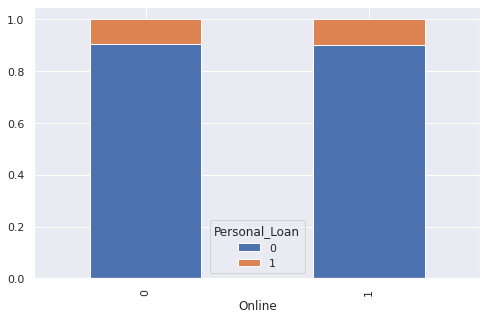

In [30]:
pd.crosstab(index = df['Online'], columns = df['Personal_Loan'], normalize = 'index').plot(kind = 'bar', stacked = True, figsize = (8,5));

**Observation:** Though the absolute number of borrowers in the online banking group is bigger, the conversion rate doesn't differ much compared to the other group.

### CD_Account vs Personal_Loan

In [31]:
pd.crosstab(index = df['CD_Account'], columns = df['Personal_Loan']).sort_values(by = 1, ascending = False)

Personal_Loan,0,1
CD_Account,,
0,4306,340
1,162,140


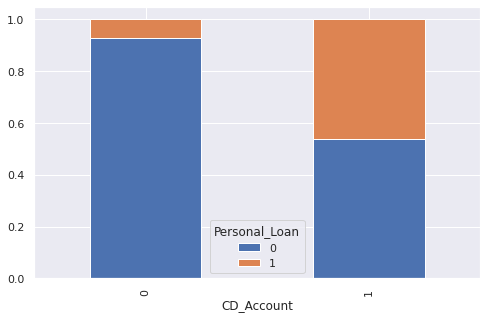

In [32]:
pd.crosstab(index = df['CD_Account'], columns = df['Personal_Loan'], normalize = 'index').plot(kind = 'bar', stacked = True, figsize = (8,5));

**Observation:** Customers with a certificate of deposit (CD) account with the bank are much more likely to be borrowers.

### Securities_Account vs Personal_Loan

In [33]:
pd.crosstab(index = df['Securities_Account'], columns = df['Personal_Loan']).sort_values(by = 1, ascending = False)

Personal_Loan,0,1
Securities_Account,,
0,4012,420
1,456,60


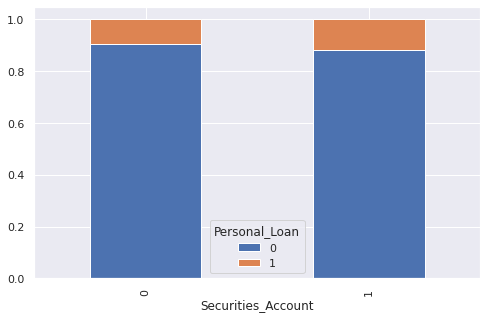

In [34]:
pd.crosstab(index = df['Securities_Account'], columns = df['Personal_Loan'], normalize = 'index').plot(kind = 'bar', stacked = True, figsize = (8,5));

**Observation:** Customers having securities account with the bank are slightly more likely to be borrowers.

### CreditCard vs Personal_Loan

In [35]:
pd.crosstab(index = df['CreditCard'], columns = df['Personal_Loan']).sort_values(by = 1, ascending = False)

Personal_Loan,0,1
CreditCard,,
0,3156,337
1,1312,143


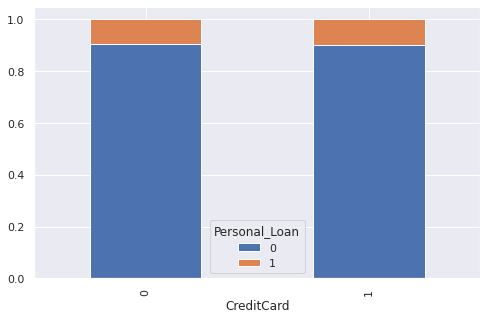

In [36]:
pd.crosstab(index = df['CreditCard'], columns = df['Personal_Loan'], normalize = 'index').plot(kind = 'bar', stacked = True, figsize = (8,5));

**Observation:** Whether having a credit card issued by any other Bank makes little difference in loan acceptance.

### Education vs Personal_Loan

In [37]:
pd.crosstab(index = df['Education'], columns = df['Personal_Loan']).sort_values(by = 1, ascending = False)

Personal_Loan,0,1
Education,,
3,1276,205
2,1205,182
1,1987,93


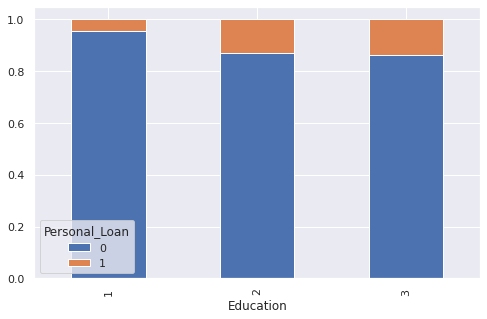

In [38]:
pd.crosstab(index = df['Education'], columns = df['Personal_Loan'], normalize = 'index').plot(kind = 'bar', stacked = True, figsize = (8,5));

**Observation:** Customer with higher education is more likely to apply for personal loan.

### ZIPCode vs Personal_Loan

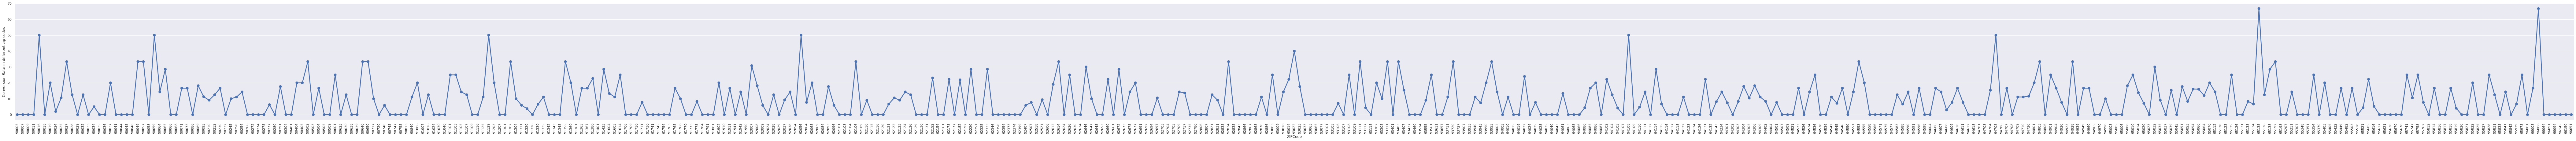

In [39]:
Conversion_Rate_df = pd.crosstab(index = df.ZIPCode, columns = df.Personal_Loan)
Conversion_Rate_df['Conversion_Rate'] = 100 * Conversion_Rate_df[1] / (Conversion_Rate_df[1] + Conversion_Rate_df[0])
plt.figure(figsize = (150,7));
sns.pointplot(x = Conversion_Rate_df.index, y = 'Conversion_Rate', data = Conversion_Rate_df);
plt.xticks(rotation = 90);
plt.xlabel('ZIPCode');
plt.ylabel('Conversion Rate in different zip codes');

In [40]:
print("Out of " + str(Conversion_Rate_df.shape[0]) + " areas, only " + str(len(Conversion_Rate_df[Conversion_Rate_df['Conversion_Rate'] > 0]))  \
      + " areas have positive conversion rate.") 

Out of 467 areas, only 238 areas have positive conversion rate.


In [41]:
Conversion_Rate_df.sort_values(by = 'Conversion_Rate', ascending = False).head(10)  # top 10 zip codes with the highest conversion rate of borrowers

Personal_Loan,0,1,Conversion_Rate
ZIPCode,,,
96008,1,2,66.666667
95135,1,2,66.666667
94108,2,2,50.000000
90016,1,1,50.000000
91129,1,1,50.000000
94705,2,2,50.000000
90059,2,2,50.000000
92056,3,3,50.000000
93022,3,2,40.000000


In [42]:
Conversion_Rate_df.sort_values(by = 1, ascending = False).head(10)   # top 10 zip codes with the highest number of borrowers

Personal_Loan,0,1,Conversion_Rate
ZIPCode,,,
94720,145,19,11.585366
94305,112,13,10.400000
92093,42,9,17.647059
90095,63,8,11.267606
90089,36,8,18.181818
94304,37,8,17.777778
92182,25,7,21.875000
95616,109,6,5.217391
94022,19,6,24.000000


**Observation:** The absolute number and conversion rate of borrowers are very imbalanced among areas. Some areas such as 96008 and 95135 gain more than 66% conversion rate. On the other hand, 229 zip codes have 0 conversion rate. The zip code with the highest number of borrowers is 94720.

## Data Pre-processing

### Drop ID column

In [43]:
df.drop('ID', axis = 1, inplace = True)

### Outlier Treatment

As the EDA shows, Income, CCAvg and Mortgage have outliers. In order to get a more robust model, need to complete outlier treatment before model building. However, As there're a lot of zeros in Mortgage, most important information may be removed after outlier treatment and thus we end up with all zeros. Therefore, we had better just do outlier treatment to Income and CCAvg.

In [44]:
def outlier_treatment(col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    IQR = q3 - q1
    return df[col].clip(lower = q1 - 1.5 * IQR, upper = q3 + 1.5 * IQR )

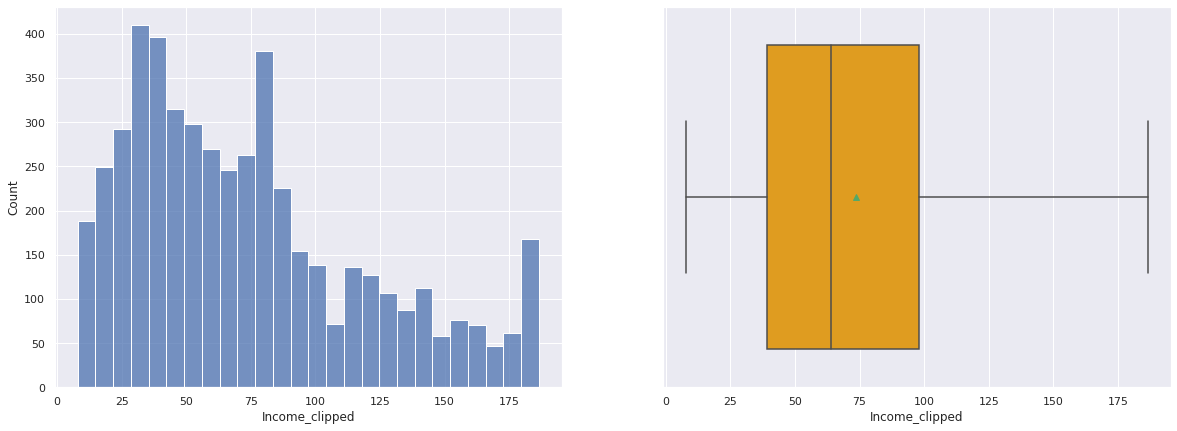

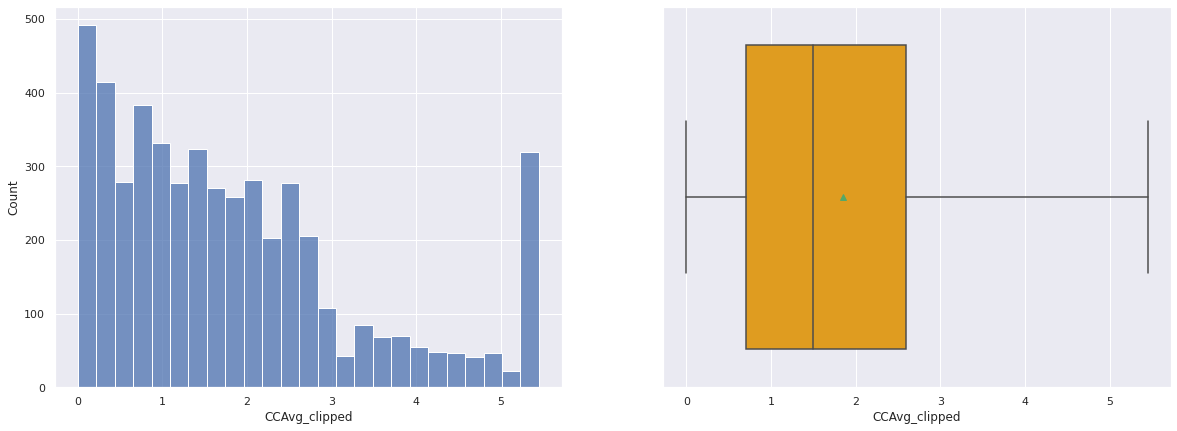

In [45]:
for col in ['Income', 'CCAvg']:     # add two clipped columns to df
    clipped_col = col + "_clipped"
    df[clipped_col] = outlier_treatment(col)
    plt.figure(figsize = (20,7))
    plt.subplot(1,2,1)
    sns.histplot(df[clipped_col]);
    plt.subplot(1,2,2)
    sns.boxplot(x = clipped_col, data = df,color = 'orange', showmeans = True);

### Split training set and testing set

In [46]:
df.sample(5)  # check the data set

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,Mortgage_Paidoff,Income_clipped,CCAvg_clipped
1989,59,35,55,90274,1,1.8,3,0,0,1,0,0,0,True,55.0,1.8
3088,56,31,28,94720,1,1.3,1,138,0,0,0,0,1,False,28.0,1.3
995,28,3,45,94305,2,1.6,3,0,0,0,0,1,1,True,45.0,1.6
1004,53,23,65,95054,4,2.0,3,0,0,0,0,1,0,True,65.0,2.0
2864,65,41,84,95762,2,0.0,3,0,0,0,0,1,1,True,84.0,0.0


In [47]:
X = df.drop(["Personal_Loan", "Mortgage_Paidoff", "Income", "CCAvg"], axis = 1)
y = df['Personal_Loan']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 3)
print("X_train size: ", X_train.shape)
print("X_test size: ", X_test.shape)
print("y_train size: ", y_train.shape)
print("y_test size: ", y_test.shape)

X_train size:  (3463, 12)
X_test size:  (1485, 12)
y_train size:  (3463,)
y_test size:  (1485,)


In [48]:
X_train.head()

,Age,Experience,ZIPCode,Family,Education,Mortgage,Securities_Account,CD_Account,Online,CreditCard,Income_clipped,CCAvg_clipped
3091,58,32,95020,3,3,158,0,0,0,1,42.0,1.4
3623,28,3,91105,4,2,95,0,0,0,0,45.0,1.7
3424,44,19,94539,4,2,0,0,0,1,1,45.0,0.0
3444,60,35,93101,1,1,0,0,0,1,0,128.0,0.9
2117,31,7,91380,3,3,0,0,0,1,0,15.0,0.9


## Model Building

### Logistic Regression

In [49]:
def compute_metrics(model, X_train, X_test, y_train, y_test, threshold = 0.5):
    """
    This function is to compute accuracy, precision, recall and f1 score for both training set and test set
    
    Input:
    model: model before fitting.
    X_train: independent variables of training set. Dimension: (m, k).
    y_train: true class labels of training set. Dimension: (m, ).    
    X_test: independent variables of test set. Dimension: (n, k).
    y_test: true class labels of test set. Dimension: (n, ). 
    threshold: the threshold value at which a probability estimate is identified as class 1.
    
    Return:
    A model fitted with training set. Predictions and a dataframe of metrics for both training and test set.
    """    
    model = model.fit(X_train, y_train)
    
    if threshold == 0.5:    
        y_pred_train = model.predict(X_train)
        y_pred_test = model.predict(X_test)
    else:
        y_pred_train = model.predict_proba(X_train)[:,1]
        y_pred_train = (y_pred_train > threshold).astype('int')        
        y_pred_test = model.predict_proba(X_test)[:,1]
        y_pred_test = (y_pred_test > threshold).astype('int')

    accuracy_train = accuracy_score(y_train, y_pred_train)
    accuracy_test = accuracy_score(y_test, y_pred_test)
    
    precision_train = precision_score(y_train, y_pred_train)
    precision_test = precision_score(y_test, y_pred_test)
    
    recall_train = recall_score(y_train, y_pred_train)
    recall_test = recall_score(y_test, y_pred_test)
    
    f1_train = f1_score(y_train, y_pred_train)
    f1_test = f1_score(y_test, y_pred_test)
    
    metrics_df = pd.DataFrame([[accuracy_train, precision_train, recall_train, f1_train],
                                                  [accuracy_test, precision_test, recall_test, f1_test]    ], 
                                                  columns = ["Accuracy", "Precision", "Recall", "F1 score"], index = ["training set", "test set"])
    
    return model, y_pred_train, y_pred_test, metrics_df
    

In [50]:
def generate_confusion_matrix(y_true, y_pred, labels = [0, 1]):
    """
    This function is to plot the confusion matrix as a heatmap.
    
    Input:
    y_true: true class labels.
    y_pred: predicted class labels.
    labels: a list of class labels.
    
    Return:
    None.
    """
    matrix = confusion_matrix(y_true, y_pred, labels = labels)  # return a n_class x n_class ndarray, i-th row and j-th column entry 
                                                                                                 # indicates the number of samples with true label being i-th class 
                                                                                                 # and predicted label being j-th class.
    matrix_df = pd.DataFrame(matrix)
    
    group_counts = ["{0:0.0f}".format(value) for value in matrix.flatten()]   # absolute value
    group_percentages = ["{0:.2%}".format(value) for value in matrix.flatten()/np.sum(matrix)]    # percent
    plot_labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_counts,group_percentages)]
    plot_labels = np.asarray(plot_labels).reshape(2,2)   # reshape into a n_class x n_class ndarray
    
    plt.figure(figsize = (7,5))
    sns.heatmap(matrix_df, annot = plot_labels, fmt='')
    plt.xlabel('Predicted Value')
    plt.ylabel('True Value')

In [51]:
def show_ROC_curve(model, X, y_true, title):
    """
    This function is to compute the roc_auc_score and plot ROC curve.
    
    Input:
    model: a model fitted with training set.
    X: independent variables.
    y_true: true class labels of dependent variable.
    title: "Training set" or "Test set".
    
    Return:
    False positive rate, true positive rate and the corresponding thresholds for the given model and given dataset.
    """
    y_score = model.predict_proba(X)[:,1]   # probability estimates for class 1
    score = roc_auc_score(y_true, y_score)
    fpr, tpr, thresholds = roc_curve(y_true, y_score)
    plt.figure(figsize = (5,5))
    plt.plot([0,1],[0,1], 'r--')
    plt.plot(fpr, tpr, 'b--')
    plt.xlim(-0.01,1.01)
    plt.ylim(-0.01,1.01)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title + ' AUC: ' + str(score))
    return fpr, tpr, thresholds

In [52]:
def precision_recall_accuracy_threshold_plot(model, X, y_true):
    """
    This function is to plot the accuracy, precision and recall against thresholds.
    
    Input:
    model: a model fitted with training set.
    X: independent variables.
    y_true: true class labels of dependent variable.
    
    Return:
    None.
    """
    y_score = model.predict_proba(X_test)[:,1]   # probability estimates for class 1
    precision, recall, thresholds = precision_recall_curve(y_true, y_score)
    
    accuracy = []
    for t in thresholds:
        accuracy.append(accuracy_score(y_true, (y_score > t)))
    
    plt.figure(figsize = (7,5))
    plt.plot(thresholds, accuracy, 'r--', label='Accuracy')    
    plt.plot(thresholds, recall[:-1], 'g--', label = 'Recall')
    plt.plot(thresholds, precision[:-1], 'm--', label = 'Precision')
    plt.legend(loc = 'lower left')
    plt.xlabel('Thresholds')
    plt.ylim(0,1.01)

In [53]:
def show_coefficient_intercept(model, feature_names):
    """
    This function is to show the dataframe of model coefficients and intercept.
    
    Input:
    model: a model fitted with training set.
    feature_name: a list of names of independent variables.
    
    Return:
    A dataframe.
    """
    coefficient_df = pd.DataFrame({"coefficient": model.coef_[0].T}, index = feature_names)
    coefficient_df.loc["intercept"] = model.intercept_
    return coefficient_df

In [54]:
lg = LogisticRegression(random_state = 10, solver = 'liblinear')    # loogistic regression model

In [55]:
lg_1, y1_train, y1_test, metrics_1 = compute_metrics(lg, X_train, X_test, y_train, y_test)
print("Logistic regression model with threshold 0.5")
metrics_1

Logistic regression model with threshold 0.5


,Accuracy,Precision,Recall,F1 score
training set,0.909327,0.546341,0.336336,0.416357
test set,0.901010,0.500000,0.326531,0.395062


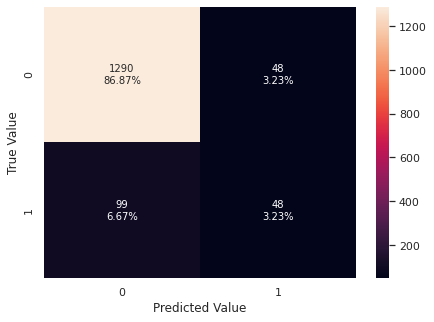

In [56]:
generate_confusion_matrix(y_test, y1_test)   # confusion matrix for test set

**Observation:** We get very high accuracy for both training set and test set, which are more than 0.9. But considering our objective is to identify whether a liability customer will buy a personal loan or not, we need to identify as many potential borrowers as possible. In this case, recall is a better metric. Recall for training set and test set just pass 0.3. We need to improve the model to get a higher recall score.

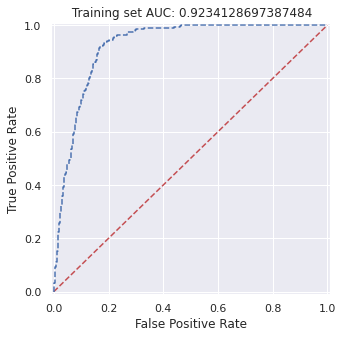

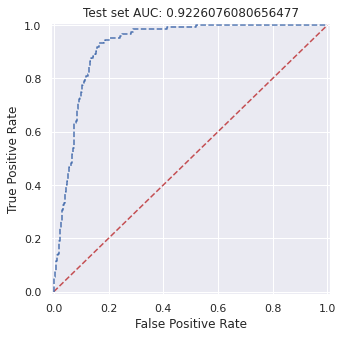

In [57]:
fpr, tpr, thresholds = show_ROC_curve(lg_1, X_train, y_train, " Training set")   # ROC curve for training set
fpr, tpr, thresholds = show_ROC_curve(lg_1, X_test, y_test, "Test set")   # ROC curve for test set

**Observation:** AUC are more than 0.9, which shows high ability to distinguish between classes. We may be able to adjust the threshold to get a better recall score.

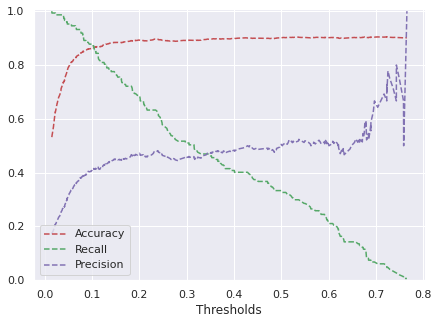

In [58]:
precision_recall_accuracy_threshold_plot(lg_1, X_test, y_test)  # accuracy, precision score and recall score against threshold for test set

**Observation:** Accuracy and precision plateau after threshold = 0.2. Recall decrease all the way down.

In [59]:
idx = np.argmax(tpr - fpr)   # the index for optimal threshold
optimal_threshold = thresholds[idx]
print("optimal threshold: " + str(optimal_threshold))

optimal threshold: 0.07528278299918716


In [60]:
lg_2, y2_train, y2_test, metrics_2 = compute_metrics(lg, X_train, X_test, y_train, y_test, optimal_threshold)
print("Logistic regression model with threshold " + str(optimal_threshold))
metrics_2

Logistic regression model with threshold 0.07528278299918716


,Accuracy,Precision,Recall,F1 score
training set,0.827317,0.349603,0.924925,0.507414
test set,0.843098,0.379888,0.925170,0.538614


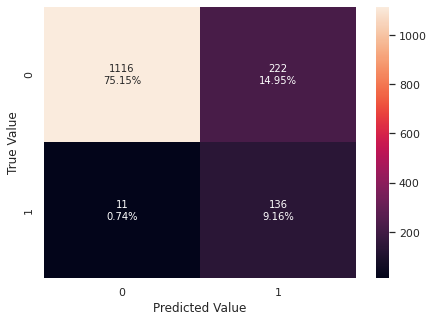

In [61]:
generate_confusion_matrix(y_test, y2_test)   # confusion matrix for test set

**Observation:** After updating the threshold to 0.075, recall is now more than 0.9 for both training set and test set. Accuracy is more than 0.8, still a desirable result.

In [62]:
log_coefficient = show_coefficient_intercept(lg_2, X_train.columns)
log_coefficient

,coefficient
Age,0.006717
Experience,0.003473
ZIPCode,-0.000073
Family,0.014915
Education,0.017182
Mortgage,0.000595
Securities_Account,0.001231
CD_Account,0.004715
Online,0.000434
CreditCard,0.000104


**Observation:** Only ZIPCode and intercept are negative. Let's see how 1 unit of each feature changes will affect the odds ratio.

In [63]:
coefficient_percent = log_coefficient.apply(lambda x: (np.exp(x) - 1) * 100, axis = 1)
coefficient_percent.rename(columns = {"coefficient": "% of change on odds"}, inplace = True)
coefficient_percent.sort_values(by = "% of change on odds", ascending = False)

,% of change on odds
Income_clipped,3.884819
Education,1.733060
Family,1.502672
CCAvg_clipped,1.039338
Age,0.674011
CD_Account,0.472576
Experience,0.347862
Securities_Account,0.123225
Mortgage,0.059565
Online,0.043406


**Observation:** It shows Income is the most important factor, followed by education level, family size and monthly spending on credit card. Since they're all positive, it means the increase in these features will lead to increase in chances of an individual accept a personal loan offer. It matches what we see in the EDA.

### Test Assumptions

### Decision Tree

## Misclassification analysis

## Conclusion

- In the campagin last year, the bank gains 9.7% conversion rate from its customers. 
- Conversion rate is very imbalanced among different zip codes. Some areas such as 96008 and 95135 gain more than 66% conversion rate. On the other hand, 229 zip codes have 0 conversion rate. The zip code with the highest number of borrowers is 94720.
- Income is an important factor for loan acceptance. The higher the income, the higher the chance an individual would become a borrower.
- Credit card spending affects loan acceptance. The higher the monthly spending on credit cards, the higher the chance an individual would become a borrower.
- House mortgage is another factor to influence loan acceptance. Although the conversion rate between mortgage paid off group and non-paid off group are similar, those with higher balance of morgage are more likely to accept the loan.
- Customers of family size of 3 or 4/ with CD accounts or securities accounts with the bank/ with higher education, are more likely to accept the loan.

## Recommendation